## Antes de começar...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/CEFET/ML/Pratica_03'

__init__.py  resultado.py	 segment.csv
__pycache__  resultado_tests.py  segments.png


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

## Avaliação - Classificação Automática de Segmentos de Imagens

Nesta prática você irá avaliar um dataset de 1.500 segmentos de imagens. Nesse projeto, cada instancia representa um segmento de 3x3 pixels de uma imagem de algum dos seguintes elementos:

<center>
<img src="https://drive.google.com/uc?id=186mCM0DkT3fNN6_kNMyk04u6zU70A7iG" alt="Imagens que foram seguementadas">
</center>
  
Assim, esta tarefa consiste em classificar tais segmentos de 3x3 pixels em um dos tipos de imagens externas (cimento, janela, grama, etc.). Cada instancia é representada da seguinte forma:

<ol>
    <li>region-centroid-col:  coluna do pixel central da região </li>
    <li>region-centroid-row:  linha do pixel central da região </li>
    <li>region-pixel-count:  o número de pixels em uma região(3x3 = 9 neste caso) </li>
    <li>short-line-density-5: resultados de uma linha extraída no algoritmo que conta quantas linhas de comprimento 5 (qualquer orientação) com baixo contraste, menor ou igual a 5, passam pela região. </li>
    <li>short-line-density-2:  igual a densidade de linha curta-5, mas conta linhas de alto contraste, maiores que 2 </li>
    <li>vedge-mean: mede o contraste de pixels adjacentes horizontalmente na região. Existem 6, a média e o desvio padrão são dados. Este atributo é usado como um detector de borda vertical.</li>
    <li>vegde-sd: desvio padrão do contraste de pixels adjacentes horizontalmente </li>
    <li>hedge-mean: mede o contraste de pixels adjacentes verticalmente. Usado para detecção de linha horizontal. </li>
    <li>hedge-sd: desvio padrão do contraste de pixels adjacentes verticalmente.</li>
    <li>intensity-mean:  a média na região de (R + G + B) / 3 </li>
    <li>rawred-mean: a média sobre a região do valor R (cor vermelha) </li>
    <li>rawblue-mean: a média sobre a região do valor B (cor azul) </li>
    <li>rawgreen-mean: a média sobre a região do valor G (cor verde) </li>
    <li>exred-mean: mede o excesso de vermelho: (2R - (G + B)) </li>
    <li>exblue-mean: mede o excesso de azul: (2B - (G + R)) </li>
    <li>exgreen-mean: mede o excesso de verde:  (2G - (R + B)) </li>
    <li>value-mean: transformação não-linear 3-d de RGB </li>
    <li>saturatoin-mean: média de saturação do RGB</li>
    <li>hue-mean: média de tonalidade do RGB </li>
    <b><li style="color: red">y-i: classe a ser inferida (ver figura acima)</li></b>
</ol>

<a href="https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/segment-challenge.arff">**Referência**</a>

In [ ]:
df_segment = pd.read_csv("/content/drive/My Drive/CEFET/ML/Pratica_03/segment.csv")
df_segment.head(10)

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,y-i
0,38,189,9,0.000000,0.000000,1.000000,0.222222,6.222220,33.318500,29.074100,26.333300,35.22220,25.66670,-8.22222,18.44440,-10.22220,35.22220,0.271208,-2.04915,5
1,25,199,9,0.000000,0.000000,1.111110,0.607407,1.055560,0.462963,17.518500,13.111100,17.88890,21.55560,-13.22220,1.11111,12.11110,21.55560,0.393002,2.69011,6
2,49,139,9,0.000000,0.000000,0.166667,0.077778,0.333333,0.088889,0.444444,0.000000,1.33333,0.00000,-1.33333,2.66667,-1.33333,1.33333,0.777778,-2.09440,2
3,63,220,9,0.000000,0.000000,3.055560,15.263000,3.666670,6.088890,8.185190,6.555560,6.44444,11.55560,-4.88889,-5.22222,10.11110,11.55560,0.486717,2.09315,6
4,161,135,9,0.000000,0.000000,0.055556,0.136083,0.111111,0.172133,1.259260,0.777778,3.00000,0.00000,-1.44444,5.22222,-3.77778,3.00000,1.000000,-1.82221,4
5,235,88,9,0.000000,0.000000,0.611111,0.240741,0.944445,0.329630,2.777780,0.444444,6.44444,1.44444,-7.00000,11.00000,-4.00000,6.44444,0.938492,-2.26954,2
6,67,32,9,0.000000,0.000000,0.944444,1.062840,1.777780,1.310920,126.222000,115.111000,142.22200,121.33300,-33.33330,48.00000,-14.66670,142.22200,0.190625,-2.33375,1
7,188,182,9,0.000000,0.000000,1.611110,0.742868,4.166670,2.126550,58.000000,51.888900,72.44440,49.66670,-18.33330,43.33330,-25.00000,72.44440,0.314281,-1.99159,5
8,217,245,9,0.111111,0.111111,3.166670,3.016620,2.166670,1.242760,9.740740,7.444440,7.11111,14.66670,-6.88889,-7.88889,14.77780,14.66670,0.572767,2.06945,6
9,9,171,9,0.000000,0.000000,1.500000,1.005540,2.777780,1.642040,45.925900,41.000000,57.22220,39.55560,-14.77780,33.88890,-19.11110,57.22220,0.307943,-2.01072,5


1. **Implementação do código de avaliação:** Primeiramente você deverá implementar as métricas de avaliação (da classe Resultado). O arquivo `resultado_tests.py` possui os testes unitários.  Veja abaixo como cada métrica, que é uma propriedade da classe (i.e. atributo calculado):
    - **mat_confusão**: Retorna a matriz de confusão correpondente. Será uma matriz em que o número de linhas e coluna é o valor numérico da maior classe na amostra.
    - **acurácia**: A partir da matriz de confusão, calcule a acurácia
    - **precisao**: A partir da matriz de confusão, calcule a precisão por classe. Caso, a quantidade de instancias preditas para uma determinda classe for zero, então `precisao[c] = 0`. Nesses casos, você deverá [lançar um warning](https://docs.python.org/3.7/library/warnings.html) da classe `UndefinedMetricWarning` com uma mensagem que não havia instancias previstas para essa classe.
    - **revocacao**: De forma similar à `precisao`, calcula a revocação por meio da matriz de confusão. Caso o número de elementos dessa classe seja igual a zero, então a revocação para esta classe também é zero e também deverá ser retornado um warning `UndefinedMetricWarning` com essa informação
    - **f1_por_classe**: Retorna, para cada classe, o seu valor F1. Caso a soma da precisão e revocação dessa classe seja zero, deverá ser retornado zero.
    - **macro_f1**: Calcula a média do f1 por classe. O método `np.average` pode ajudar.
    
A matriz de confusão já está implementada, as demais possuem algo para você complementar. Se necessário, <a href="https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b">Explicações sobre precisão e revocação</a> Veja também nos slides



2. **Método eval da classe fold**: O método `eval` passará como parametro um método de aprendizado de máquina (por ex, uma instancia de [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)). Assim, usando esse parametro, você deverá criar o modelo de treino (usando as features de `df_treino` e a sua classe) e classificar os elementos de `df_data_to_predict`.

3. **Obtenção e divisão do Dataset:** Nesta prática, iremos trabalhar com 80% de treino e 20% de teste. Leia o dataset [`segment.csv`](segment.csv) e divida-o apropriadamente. Não esqueça que a amostra deve ser aleatória. Coloque como `random_state=1`

In [ ]:
#df treino 80% e df test complemento do 80% (df - df treino) e coluna a ser avaliada
df_treino = df_segment.sample(frac = 0.8, random_state = 1)
df_teste = df_segment.drop(df_treino.index)
col_classe = "y-i"

4. **Criação do modelo e avaliação** dos modelos: agora, você deverá avaliar 4 modelos de aprendizado de máquina nessa tarefa. Use os métodos SVM com kernel linear e RBF, KNN e árvore de decisão. Deixe os parametros padrão de cada algoritmo. Por meio do método eval da classe Fold, avalie o método. Apresente a matriz de confusão resultante de cada um desses métodos além das métricas macro f1, precisão e revocação por classe. Também verifique  quão sensível são os resultados se mudarmos o parametro `random_seed`. Você pode criar mais de um bloco de código/texto para isso organizando da forma que julgar melhor.

    <ul>
        <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">SVM</a></li>
        <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNN</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Árvore de decisão</a></li>
    </ul>


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#criação do svm
svm_clf = SVC(gamma='auto')

#criação do knn
knn_clf = KNeighborsClassifier()

#criação da arvore de decisão
tree_clf = DecisionTreeClassifier()

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/CEFET/ML/Pratica_03')
from resultado import Fold
fold = Fold(df_treino,df_teste,col_classe)

In [ ]:
tree_result = fold.eval(tree_clf)
df_tree_result = pd.DataFrame(tree_result.mat_confusao)
df_tree_result

,0,1,2,3,4,5,6
0,43.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,39.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,44.0,1.0,3.0,0.0,0.0
3,0.0,0.0,2.0,35.0,1.0,0.0,0.0
4,1.0,0.0,2.0,4.0,36.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,48.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,40.0


In [ ]:
svm_result = fold.eval(svm_clf)
df_svm_result = pd.DataFrame(svm_result.mat_confusao)
df_svm_result

,0,1,2,3,4,5,6
0,21.0,0.0,0.0,22.0,0.0,0.0,0.0
1,0.0,19.0,0.0,20.0,0.0,0.0,0.0
2,0.0,0.0,20.0,28.0,0.0,0.0,0.0
3,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,0.0,0.0,0.0,24.0,19.0,0.0,0.0
5,0.0,0.0,0.0,21.0,0.0,28.0,0.0
6,0.0,0.0,0.0,29.0,0.0,0.0,11.0


In [ ]:
knn_result = fold.eval(knn_clf)
df_knn_result = pd.DataFrame(knn_result.mat_confusao)
df_knn_result

,0,1,2,3,4,5,6
0,42.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,39.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,42.0,1.0,2.0,0.0,0.0
3,0.0,0.0,1.0,35.0,1.0,1.0,0.0
4,2.0,0.0,7.0,3.0,31.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,49.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,40.0


In [ ]:
df_acuracia = pd.DataFrame({"Tree":tree_result.acuracia,
                            "SVM":svm_result.acuracia,
                            "KNN":knn_result.acuracia},
                            index=["Acuracia"])
df_acuracia

,Tree,SVM,KNN
Acuracia,0.95,0.52,0.926667


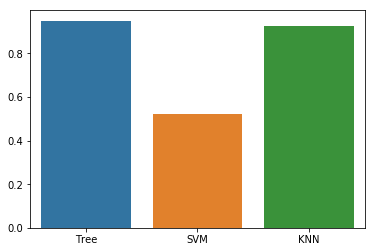

In [ ]:
acuracia_plot = sns.barplot(data=df_acuracia)
acuracia_plot

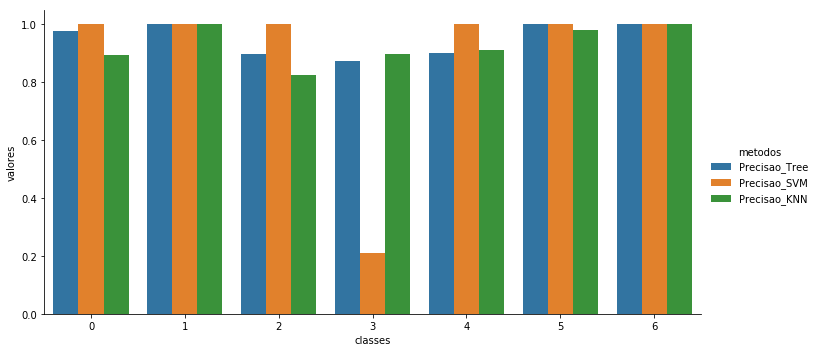

In [ ]:
df_precisao = pd.DataFrame({"classes":[0,1,2,3,4,5,6],
                            "Precisao_Tree":tree_result.precisao,
                            "Precisao_SVM":svm_result.precisao,
                            "Precisao_KNN":knn_result.precisao})

df_melt_precisao = pd.melt(df_precisao,
                           id_vars="classes",
                           var_name="metodos",
                           value_name="valores")

precisao_plot = sns.catplot(data=df_melt_precisao,
                            hue="metodos",
                            x="classes",
                            y="valores",
                            kind="bar",
                            aspect=2)

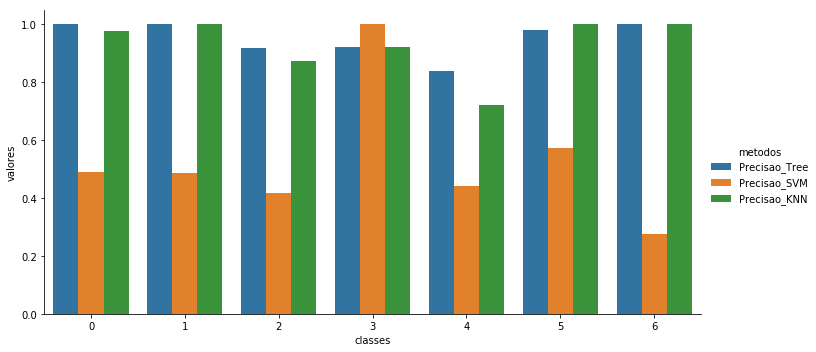

In [ ]:
df_revocacao = pd.DataFrame({"classes":[0,1,2,3,4,5,6],
                            "Precisao_Tree":tree_result.revocacao,
                            "Precisao_SVM":svm_result.revocacao,
                            "Precisao_KNN":knn_result.revocacao})

df_melt_revocacao = pd.melt(df_revocacao,
                           id_vars="classes",
                           var_name="metodos",
                           value_name="valores")

revocacao_plot = sns.catplot(data=df_melt_revocacao,
                            hue="metodos",
                            x="classes",
                            y="valores",
                            kind="bar",
                            aspect=2)

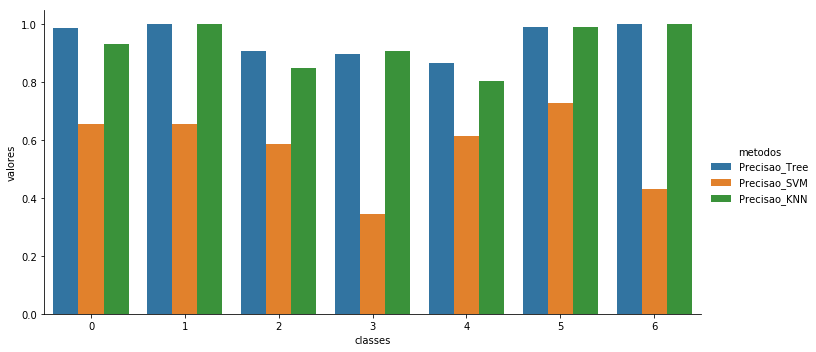

In [ ]:
df_f1_por_classe = pd.DataFrame({"classes":[0,1,2,3,4,5,6],
                            "Precisao_Tree":tree_result.f1_por_classe,
                            "Precisao_SVM":svm_result.f1_por_classe,
                            "Precisao_KNN":knn_result.f1_por_classe})

df_melt_f1_por_classe = pd.melt(df_f1_por_classe,
                           id_vars="classes",
                           var_name="metodos",
                           value_name="valores")

f1_por_classe_plot = sns.catplot(data=df_melt_f1_por_classe,
                            hue="metodos",
                            x="classes",
                            y="valores",
                            kind="bar",
                            aspect=2)

In [ ]:
df_macro_f1 = pd.DataFrame({"Tree":tree_result.macro_f1,
                            "SVM":svm_result.macro_f1,
                            "KNN":knn_result.macro_f1},
                            index=["Macro_F1"])
df_macro_f1

,Tree,SVM,KNN
Macro_F1,0.950046,0.573809,0.926572


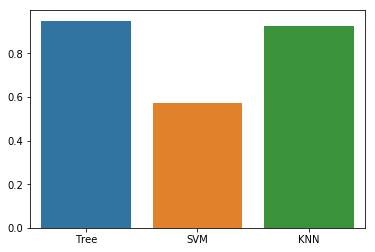

In [ ]:
macro_f1_plot = sns.barplot(data=df_macro_f1)
macro_f1_plot

5. **Conclusões:** Escreva um texto com uma análise e conclusão dos resultados, por exemplo: quais são as classes mais dificieis/fácieis de prever? Quais se confundem mais? Qual é o melhor método de classificação?

Foram usados 3 métodos para predição de valores do grupo de dados estudado, Árvore (Tree), SVM e Vizinhança (KNN).<br>
À todos foram aplicadas os mesmos testes para comparar qual seria o melhor método em geral e quais seriam os melhores por classe.<br>
No geral, o KNN e o Tree apresentaram performance bastante aceitáveis, com uma pequena vantagem para a Tree, tanto na comparação de Acuracia quanto na Macro F1 (ambos os testes 95 e 93% de acertividade respectivamente).<br>
A performance do SVM em ambos os testes foi muito ruim (52 e 57% de acertividade respectivamente).<br>
Ao se analisar as tabelas de confusão e confirmando nos testes de Precisão, Revocação e F1, dos três métodos utilizados, pode-se verificar uma dificuldade em predizer as classes 2, 3 e 4 e esta dificultade em prever os resultados nestas 3 classes faz com que o SVM se apresente como uma boa alternativa na predição das classes 2 e 4, conforme verificado no teste de Precisão dos métodos por classe.<br>
Como nas demais classes deste teste o SVM performou parecido com os demais métodos, ele torna-se uma solução interessante quando o foco é analisar um maior conteúdo das classes 2 e 4.<br>
Desta maneira, seria interressante concluir que o melhor método, em uma análise geral, onde a intenção é apenas classificar a imagem entre os grupos, é o Tree, por apresentar melhor performance de Acuracia e Macro F1, no entanto, se a intenção é verificar se a imagem pertence ao grupo 2 ou 4, seria interessante considerar o SVN como melhor método, por ele ter apresentado melhor performance no teste de Precisão para estas duas classes.